In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.cm as cm

In [87]:
data = pd.read_excel("C:/Users/wkaco/Desktop/COMPONENTS OF GDP.xlsx")

In [88]:
data.dropna().head()   

,Unnamed: 0,Motor Vehicles and Parts,Furnishings and Durable Household Equipment,Recreational Goods and Vehicles,Other Durable Goods,Food and Beverages Purchased for Off-Premises Consumption,Clothing and Footwear,Gasoline and Other Energy Goods,Other Nondurable Goods,Housing and Utilities,...,Other Services,Structures,Equipment,Intellectual Property Products,Residential Fixed Investment,Change in Private Inventories,National Defense,Nondefense,State and Local,Net Export
0,2011-10-01,0.024376,0.016122,0.019830,0.011425,0.053485,0.021814,0.026862,0.055792,0.128729,...,0.058999,0.028496,0.058231,0.041328,0.025231,0.006705,0.053299,0.030018,0.118624,-0.038817
1,2012-01-01,0.024868,0.016235,0.019791,0.011520,0.053392,0.021956,0.027091,0.056033,0.126254,...,0.058998,0.029911,0.059230,0.041067,0.026348,0.005108,0.052434,0.030033,0.117579,-0.038321
2,2012-04-01,0.024687,0.015924,0.019567,0.011388,0.053374,0.021623,0.026325,0.055429,0.126947,...,0.058232,0.030815,0.060430,0.041273,0.026471,0.005771,0.051518,0.029836,0.116283,-0.035686
3,2012-07-01,0.024751,0.015864,0.019548,0.011427,0.053135,0.021708,0.026216,0.055088,0.127163,...,0.057852,0.030394,0.059845,0.041195,0.027198,0.005294,0.051433,0.029696,0.115714,-0.032801
4,2012-10-01,0.025570,0.015933,0.019625,0.011464,0.053210,0.021657,0.026635,0.055123,0.127023,...,0.057729,0.029626,0.060727,0.041591,0.028756,0.001793,0.049686,0.029520,0.116213,-0.032184


In [89]:
print("Suma wartości w pierwszym wierszu:", sum(df[categories].iloc[0]))

Suma wartości w pierwszym wierszu: 0.9999999999999999


In [90]:
categories = [
    "Motor Vehicles and Parts",
    "Furnishings and Durable Household Equipment",
    "Recreational Goods and Vehicles",
    "Other Durable Goods",
    "Food and Beverages Purchased for Off-Premises Consumption",
    "Clothing and Footwear",
    "Gasoline and Other Energy Goods",
    "Other Nondurable Goods",
    "Housing and Utilities",
    "Health Care",
    "Transportation Services",
    "Recreation Services",
    "Food Services and Accommodations",
    "Financial Services and Insurance",
    "Other Services",
    "Structures",
    "Equipment",
    "Intellectual Property Products",
    "Residential Fixed Investment",
    "Change in Private Inventories",
    "National Defense",
    "Nondefense",
    "State and Local",
    "Net Export"
]

In [91]:
data['Data'] = pd.to_datetime(df.iloc[:, 0], format='%d.%m.%Y')

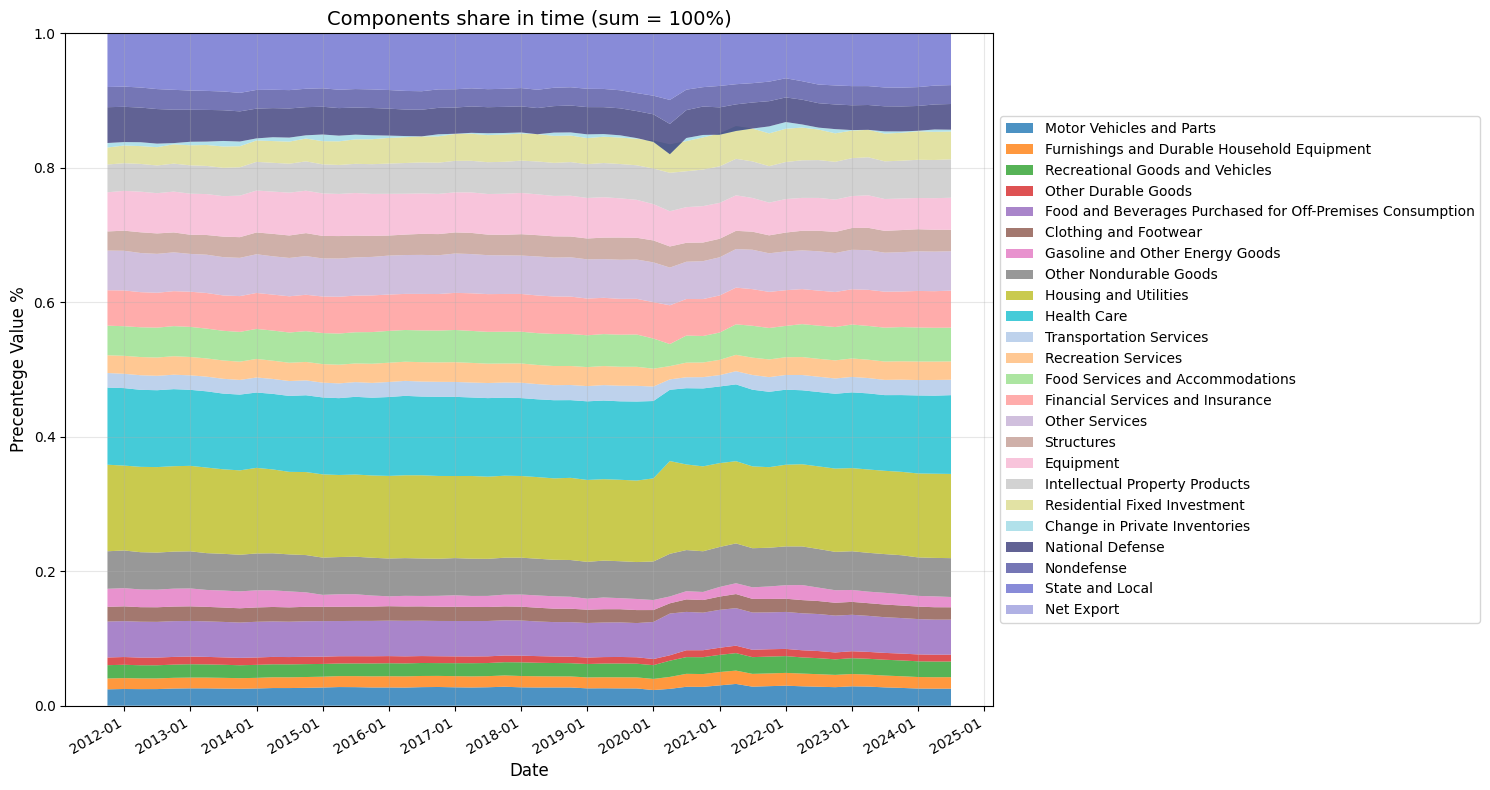


Weryfikacja sum dla wszystkich wierszy:
Wiersz 1: 1.00%
Wiersz 2: 1.00%
Wiersz 3: 1.00%
Wiersz 4: 1.00%
Wiersz 5: 1.00%


In [96]:
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede'
][:len(categories)]  # Dopasowanie liczby kolorów do liczby kategorii

plt.figure(figsize=(15, 8))

# Konwertujemy wartości na ułamki dziesiętne (jeśli są w procentach)
data_to_plot = [df[cat].values for cat in categories]

# Tworzenie stacked area chart używając dat
plt.stackplot(df['Data'], 
              data_to_plot,
              labels=categories,
              colors=colors,  # Ręcznie zdefiniowane kolory
              alpha=0.8)

# Dostosowanie wykresu
plt.title('Components share in time (sum = 100%)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precentege Value %', fontsize=12)

# Formatowanie osi Y, aby pokazywać wartości od 0 do 100
plt.ylim(0, 1)

# Formatowanie osi X z datami
plt.gcf().autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Dodanie legendy i siatki
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.grid(True, alpha=0.3)

# Dopasowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

# Dodatkowa weryfikacja danych
print("\nWeryfikacja sum dla wszystkich wierszy:")
for i in range(min(5, len(df))):  # Pokazujemy pierwsze 5 wierszy
    row_sum = sum(df[categories].iloc[i])
    print(f"Wiersz {i+1}: {row_sum:.2f}%")